## Example-1 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
# Load training and test datasets
df_train = pd.read_csv("buy_comp_train_data.csv")
df_test = pd.read_csv("buy_comp_test_data.csv")
print(len(df_train))
df_train.head(15)

14


,Age,Income,Student,Credit Rating,Buy Comp
0,<=30,High,No,Fair,No
1,<=30,High,No,Exc,No
2,31-40,High,No,Fair,Yes
3,>40,Med,No,Fair,Yes
4,>40,Low,Yes,Fair,Yes
5,>40,Low,Yes,Exc,No
6,31-40,Low,Yes,Exc,Yes
7,<=30,Med,No,Fair,No
8,<=30,Low,Yes,Fair,Yes
9,>40,Med,Yes,Fair,Yes


In [23]:
print(len(df_test))
df_test.head()

2


,Age,Income,Student,Credit Rating,Buy Comp
0,<=30,Med,Yes,Fair,Unknown
1,>40,High,No,Exc,Unknown


### 2. Create Dataframe using Sample with Replacement or Bootsrap method

In [24]:
# Function to create bootstrap samples (now called frames)
def create_bootstrap_frames(df_train, n_frames=5):
    # Each frame will contain all 14 rows, sampled with replacement
    bootstrap_frames = [df_train.sample(n=len(df_train), replace=True).reset_index(drop=True) for _ in range(n_frames)]
    return bootstrap_frames

# Create 5 bootstrap frames
bootstrap_frames = create_bootstrap_frames(df_train, n_frames=5)

# Assign the frames to individual variables
df_train1, df_train2, df_train3, df_train4, df_train5 = bootstrap_frames

# Display the 5 dataframes
print("df_train1:\n", df_train1, "\n")
print("df_train2:\n", df_train2, "\n")
print("df_train3:\n", df_train3, "\n")
print("df_train4:\n", df_train4, "\n")
print("df_train5:\n", df_train5, "\n")


df_train1:
       Age Income Student Credit Rating Buy Comp
0    <=30   High      No          Fair       No
1     >40    Low     Yes           Exc       No
2     >40    Low     Yes          Fair      Yes
3    <=30   High      No           Exc       No
4    <=30   High      No           Exc       No
5   31-40   High     Yes          Fair      Yes
6   31-40   High     Yes          Fair      Yes
7    <=30    Med      No          Fair       No
8   31-40    Low     Yes           Exc      Yes
9   31-40    Med      No           Exc      Yes
10    >40    Med      No           Exc       No
11   <=30    Med     Yes           Exc      Yes
12    >40    Med      No          Fair      Yes
13   <=30   High      No           Exc       No 

df_train2:
       Age Income Student Credit Rating Buy Comp
0    <=30    Low     Yes          Fair      Yes
1    <=30    Med      No          Fair       No
2     >40    Med     Yes          Fair      Yes
3     >40    Low     Yes           Exc       No
4     >40    M

### 3. One-Hot Encoding and Restoring Target Variable

In [25]:
# Converting categorical variables to numerical using one-hot encoding
df_encoded_train = pd.get_dummies(df_train.drop('Buy Comp', axis=1))
df_encoded_train1 = pd.get_dummies(df_train1.drop('Buy Comp', axis=1))
df_encoded_train2 = pd.get_dummies(df_train2.drop('Buy Comp', axis=1))
df_encoded_train3 = pd.get_dummies(df_train3.drop('Buy Comp', axis=1))
df_encoded_train4 = pd.get_dummies(df_train4.drop('Buy Comp', axis=1))
df_encoded_train5 = pd.get_dummies(df_train5.drop('Buy Comp', axis=1))
df_encoded_test = pd.get_dummies(df_test.drop('Buy Comp', axis=1))

# Align the columns in the test set to match the train set
df_encoded_test = df_encoded_test.reindex(columns=df_encoded_train.columns, fill_value=0)

# After One hot encoding again add target column
df_encoded_train['Buy Comp'] = df_train['Buy Comp'] 
df_encoded_train1['Buy Comp'] = df_train1['Buy Comp'] 
df_encoded_train2['Buy Comp'] = df_train2['Buy Comp'] 
df_encoded_train3['Buy Comp'] = df_train3['Buy Comp'] 
df_encoded_train4['Buy Comp'] = df_train4['Buy Comp'] 
df_encoded_train5['Buy Comp'] = df_train5['Buy Comp'] 

df_encoded_test['Buy Comp'] = df_test['Buy Comp']

### 4. Splitting Features and Target for Training and Testing

In [26]:
# Split features and target
X_train = df_encoded_train.drop('Buy Comp', axis=1)  # Features
y_train = df_encoded_train['Buy Comp']  # Target

X_train1 = df_encoded_train1.drop('Buy Comp', axis=1)  # Features
y_train1 = df_encoded_train1['Buy Comp']  # Target

X_train2 = df_encoded_train2.drop('Buy Comp', axis=1)  # Features
y_train2 = df_encoded_train2['Buy Comp']  # Target

X_train3 = df_encoded_train3.drop('Buy Comp', axis=1)  # Features
y_train3 = df_encoded_train3['Buy Comp']  # Target

X_train4 = df_encoded_train4.drop('Buy Comp', axis=1)  # Features
y_train4 = df_encoded_train4['Buy Comp']  # Target

X_train5 = df_encoded_train5.drop('Buy Comp', axis=1)  # Features
y_train5 = df_encoded_train5['Buy Comp']  # Target

# In the test set, we don't have the target, so just use the features
X_test = df_encoded_test.drop('Buy Comp', axis=1)

### 5. Train the Decision Tree Classifier

In [27]:
# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [28]:
# Train the Decision Tree Classifier
clf1 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf1.fit(X_train1, y_train1)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [29]:
# Train the Decision Tree Classifier
clf2 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf2.fit(X_train2, y_train2)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [30]:
# Train the Decision Tree Classifier
clf3 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf3.fit(X_train3, y_train3)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [31]:
# Train the Decision Tree Classifier
clf4 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf4.fit(X_train4, y_train4)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [32]:
# Train the Decision Tree Classifier
clf5 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf5.fit(X_train5, y_train5)

DecisionTreeClassifier(criterion='entropy', random_state=42)

### 6. Vizualise the Tree

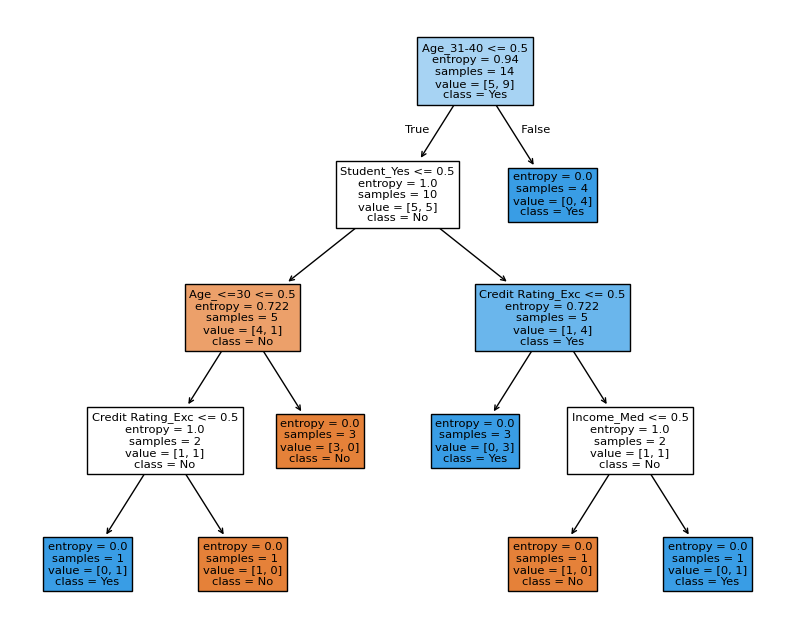

In [33]:
plt.figure(figsize=(10, 8))
tree.plot_tree(clf, feature_names=X_train.columns.tolist(), class_names=['No', 'Yes'], filled=True )
plt.show()

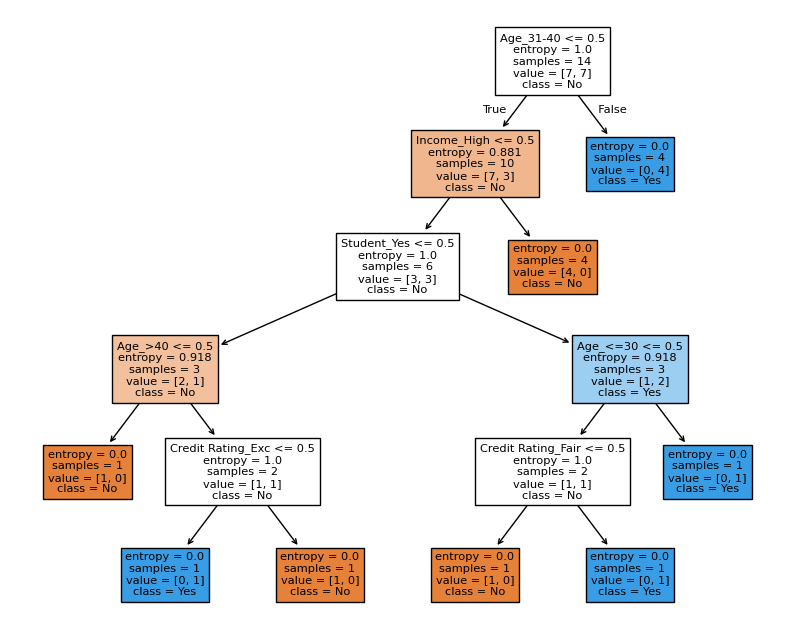

In [34]:
plt.figure(figsize=(10, 8))
tree.plot_tree(clf1, feature_names=X_train1.columns.tolist(), class_names=['No', 'Yes'], filled=True )
plt.show()

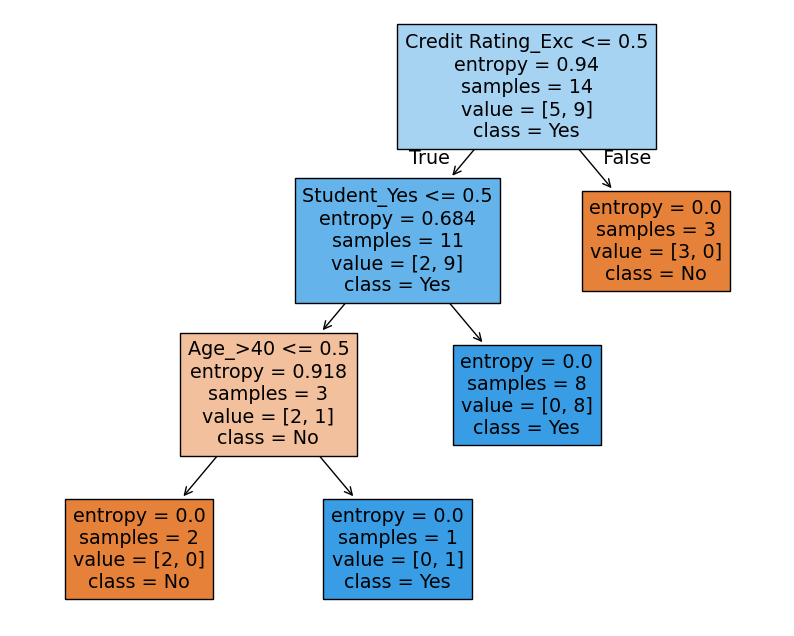

In [35]:
plt.figure(figsize=(10, 8))
tree.plot_tree(clf2, feature_names=X_train2.columns.tolist(), class_names=['No', 'Yes'], filled=True )
plt.show()

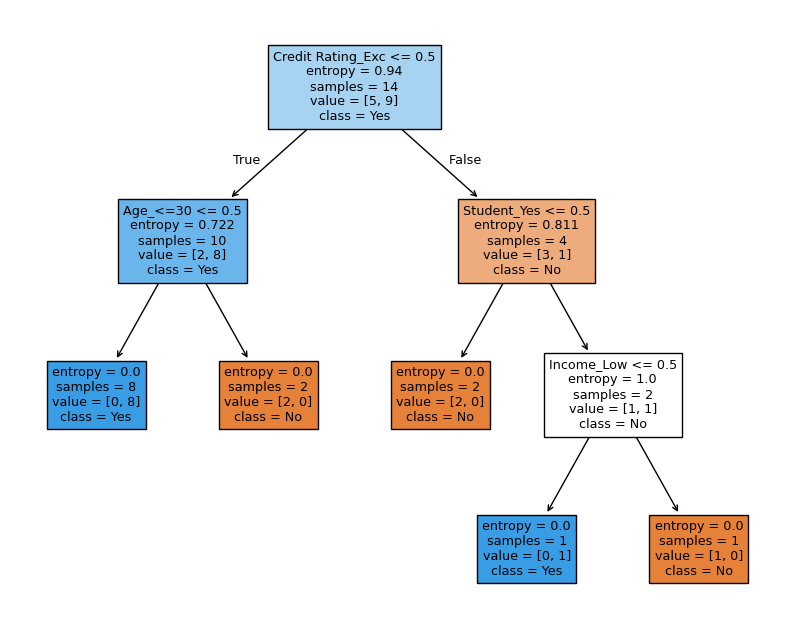

In [36]:
plt.figure(figsize=(10, 8))
tree.plot_tree( clf3, feature_names=X_train3.columns.tolist(), class_names=['No', 'Yes'], filled=True )
plt.show()

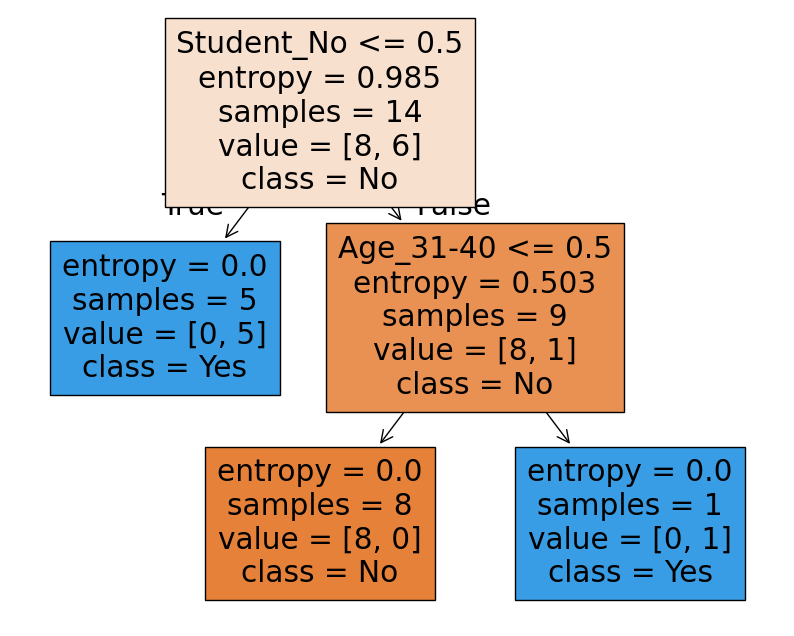

In [37]:
plt.figure(figsize=(10, 8))
tree.plot_tree( clf4, feature_names=X_train4.columns.tolist(), class_names=['No', 'Yes'], filled=True )
plt.show()

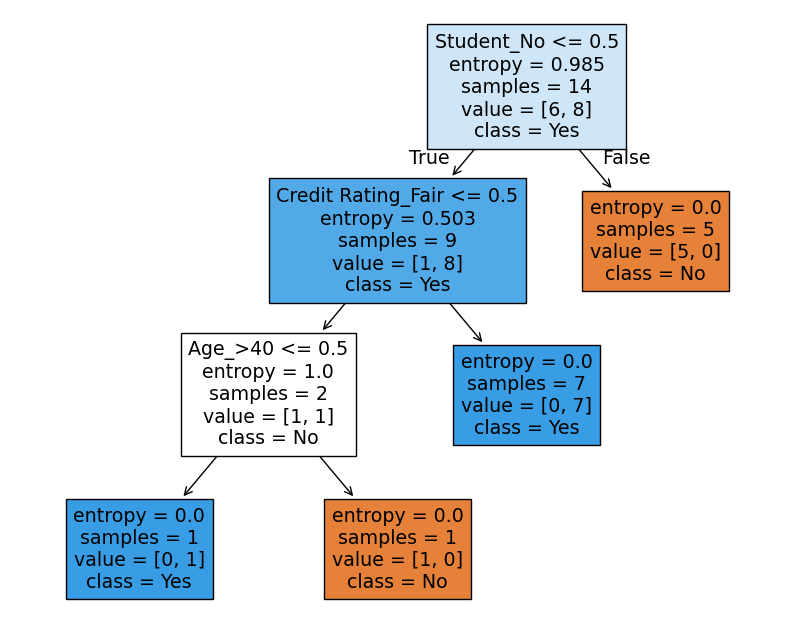

In [38]:
plt.figure(figsize=(10, 8))
tree.plot_tree( clf5, feature_names=X_train5.columns.tolist(), class_names=['No', 'Yes'], filled=True )
plt.show()

### 7. Predict the test set results

In [39]:
# Predict the test set results
y_pred = clf.predict(X_test)
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)
y_pred4 = clf4.predict(X_test)
y_pred5 = clf5.predict(X_test)

print("Prediction of Test set using model of oriional data :",y_pred)
print("Prediction of Test set using model-1 :",y_pred1)
print("Prediction of Test set using model-2 :",y_pred2)
print("Prediction of Test set using model-3 :",y_pred3)
print("Prediction of Test set using model-4 :",y_pred4)
print("Prediction of Test set using model-5 :",y_pred5)

Prediction of Test set using model of oriional data : ['Yes' 'No']
Prediction of Test set using model-1 : ['Yes' 'No']
Prediction of Test set using model-2 : ['Yes' 'No']
Prediction of Test set using model-3 : ['No' 'No']
Prediction of Test set using model-4 : ['Yes' 'No']
Prediction of Test set using model-5 : ['Yes' 'No']


In [40]:
predict_test1 = np.array([y_pred1[0], y_pred2[0], y_pred3[0], y_pred4[0], y_pred5[0]])
predict_test2 = np.array([y_pred1[1], y_pred2[1], y_pred3[1], y_pred4[1], y_pred5[1]])
print("Prediction of test set1 by each model :",predict_test1)
print("Prediction of test set2 by each model :",predict_test2)

Prediction of test set1 by each model : ['Yes' 'Yes' 'No' 'Yes' 'Yes']
Prediction of test set2 by each model : ['No' 'No' 'No' 'No' 'No']


In [41]:
# Use np.unique to find the unique values and their frequencies
value1, count1 = np.unique(predict_test1, return_counts=True)
value2, count2 = np.unique(predict_test2, return_counts=True)

# Find the value with the maximum frequency
majority_vote_for_test1 = value1[np.argmax(count1)]
majority_vote_for_test2 = value2[np.argmax(count2)]

# Output the most frequent value
print("Prediction of test set 1 is =",majority_vote_for_test1)
print("Prediction of test set 2 is =",majority_vote_for_test2)

Prediction of test set 1 is = Yes
Prediction of test set 2 is = No


## Example-2

### 1. Import the Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

### 2. Load the Datasets

In [2]:
df = pd.read_csv("play_tennis_full.csv")
print(len(df))
df.head()

18


,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


### 3. Binary encoding the target variable

In [3]:
# Converting categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df.drop('PlayTennis', axis=1))
#df_encoded['PlayTennis'] = df['PlayTennis'].map({'Yes': 1, 'No': 0})  # Binary encoding for the target
df_encoded['PlayTennis'] = df['PlayTennis']

X = df_encoded.drop('PlayTennis', axis=1)  # Features
y = df_encoded['PlayTennis']  # Target

### 4. Splitting the data into test and train sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Combine df1 and df2 side by side (column-wise)
df_train = pd.concat([X_train, y_train], axis=1)
df_train

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak,PlayTennis
3,False,True,False,False,False,True,True,False,False,True,Yes
13,False,True,False,False,False,True,True,False,True,False,No
16,False,True,False,False,False,True,True,False,True,False,No
15,True,False,False,False,True,False,True,False,False,True,Yes
11,True,False,False,False,False,True,True,False,True,False,Yes
2,True,False,False,False,True,False,True,False,False,True,Yes
9,False,True,False,False,False,True,False,True,False,True,Yes
17,False,False,True,False,False,True,False,True,True,False,Yes
4,False,True,False,True,False,False,False,True,False,True,Yes
12,True,False,False,False,True,False,False,True,False,True,Yes


### 5. Bagging using Sampling with replacement

In [6]:
# Function to create bootstrap samples (now called frames)
def create_bootstrap_frames(df_train, n_frames=5):
    # Each frame will contain all 14 rows, sampled with replacement
    bootstrap_frames = [df_train.sample(n=len(df_train), replace=True).reset_index(drop=True) for _ in range(n_frames)]
    return bootstrap_frames

# Create 5 bootstrap frames
bootstrap_frames = create_bootstrap_frames(df_train, n_frames=5)

# Assign the frames to individual variables
df_train1, df_train2, df_train3, df_train4, df_train5 = bootstrap_frames

# Display the 5 dataframes
print("df_train1:\n", df_train1, "\n")
print("df_train2:\n", df_train2, "\n")
print("df_train3:\n", df_train3, "\n")
print("df_train4:\n", df_train4, "\n")
print("df_train5:\n", df_train5, "\n")

df_train1:
     Outlook_Overcast  Outlook_Rain  Outlook_Sunny  Temperature_Cool  \
0               True         False          False             False   
1              False         False           True             False   
2              False         False           True             False   
3              False          True          False             False   
4               True         False          False             False   
5               True         False          False             False   
6               True         False          False             False   
7              False         False           True             False   
8              False          True          False             False   
9              False          True          False              True   
10              True         False          False             False   
11              True         False          False              True   
12              True         False          False             Fal

In [7]:
# Split the df into features and target
X_train = df_train[['Outlook_Overcast', 'Outlook_Rain', 'Outlook_Sunny','Temperature_Cool','Temperature_Hot','Temperature_Mild','Humidity_High','Humidity_Normal','Wind_Strong','Wind_Weak']]
y_train = df_train[['PlayTennis']]

X_train1 = df_train1[['Outlook_Overcast', 'Outlook_Rain', 'Outlook_Sunny','Temperature_Cool','Temperature_Hot','Temperature_Mild','Humidity_High','Humidity_Normal','Wind_Strong','Wind_Weak']]
y_train1 = df_train1[['PlayTennis']]

X_train2 = df_train2[['Outlook_Overcast', 'Outlook_Rain', 'Outlook_Sunny','Temperature_Cool','Temperature_Hot','Temperature_Mild','Humidity_High','Humidity_Normal','Wind_Strong','Wind_Weak']]
y_train2 = df_train2[['PlayTennis']]

X_train3 = df_train3[['Outlook_Overcast', 'Outlook_Rain', 'Outlook_Sunny','Temperature_Cool','Temperature_Hot','Temperature_Mild','Humidity_High','Humidity_Normal','Wind_Strong','Wind_Weak']]
y_train3 = df_train3[['PlayTennis']]

X_train4 = df_train4[['Outlook_Overcast', 'Outlook_Rain', 'Outlook_Sunny','Temperature_Cool','Temperature_Hot','Temperature_Mild','Humidity_High','Humidity_Normal','Wind_Strong','Wind_Weak']]
y_train4 = df_train4[['PlayTennis']]

X_train5 = df_train5[['Outlook_Overcast', 'Outlook_Rain', 'Outlook_Sunny','Temperature_Cool','Temperature_Hot','Temperature_Mild','Humidity_High','Humidity_Normal','Wind_Strong','Wind_Weak']]
y_train5 = df_train5[['PlayTennis']]

### 6. Using the built-in function for decision tree classifier

In [8]:
# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [9]:
# Train the Decision Tree Classifier
clf1 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf1.fit(X_train1, y_train1)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [10]:
# Train the Decision Tree Classifier
clf2 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf2.fit(X_train2, y_train2)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [11]:
# Train the Decision Tree Classifier
clf3 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf3.fit(X_train3, y_train3)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [12]:
# Train the Decision Tree Classifier
clf4 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf4.fit(X_train4, y_train4)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [13]:
# Train the Decision Tree Classifier
clf5 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf5.fit(X_train5, y_train5)

DecisionTreeClassifier(criterion='entropy', random_state=42)

### 7. Vizualise Tree

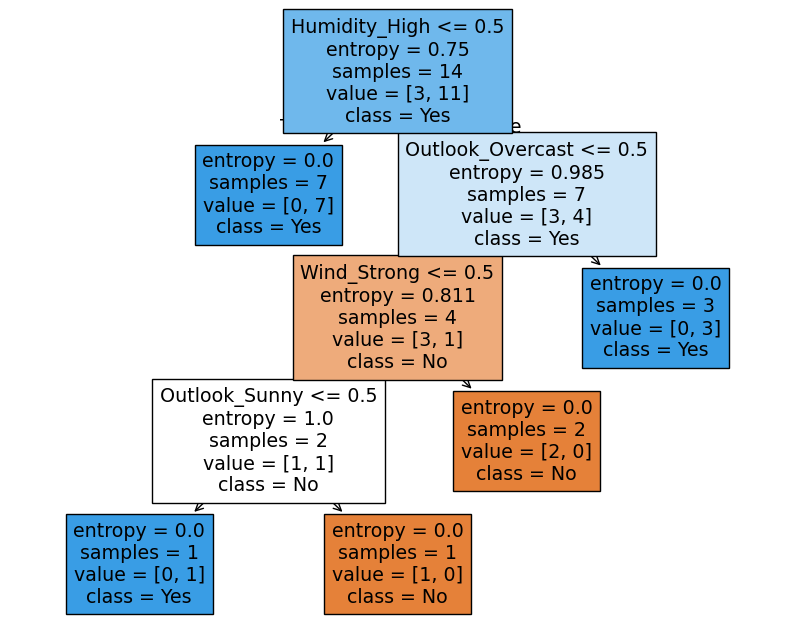

In [14]:
plt.figure(figsize=(10,8))
tree.plot_tree(clf, feature_names=X_train.columns.tolist(), class_names=['No', 'Yes'], filled=True)
plt.show()

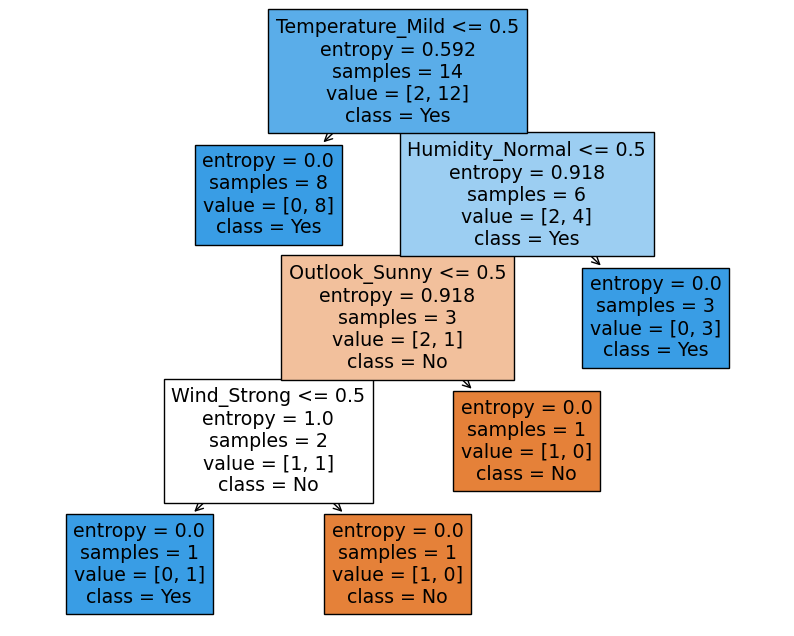

In [15]:
plt.figure(figsize=(10,8))
tree.plot_tree(clf1, feature_names=X_train1.columns.tolist(), class_names=['No', 'Yes'], filled=True)
plt.show()

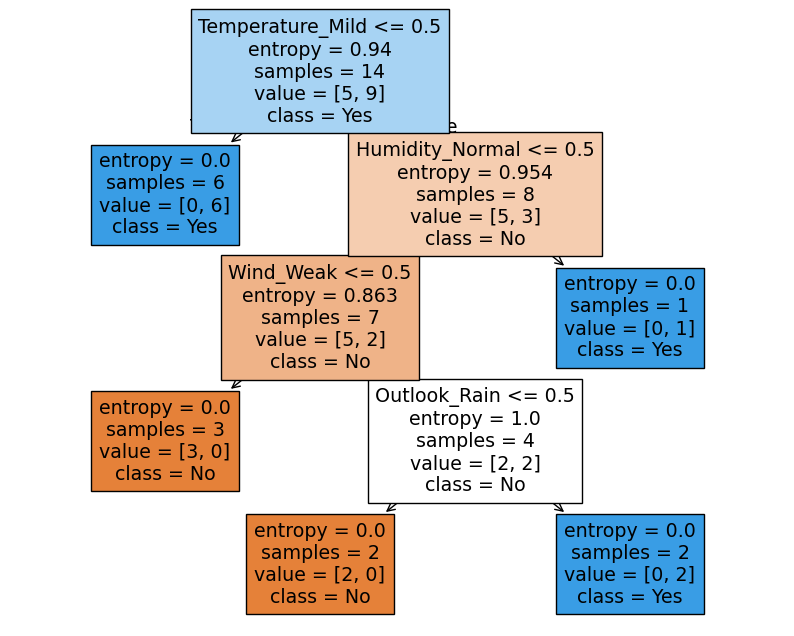

In [16]:
plt.figure(figsize=(10,8))
tree.plot_tree(clf2, feature_names=X_train2.columns.tolist(), class_names=['No', 'Yes'], filled=True)
plt.show()

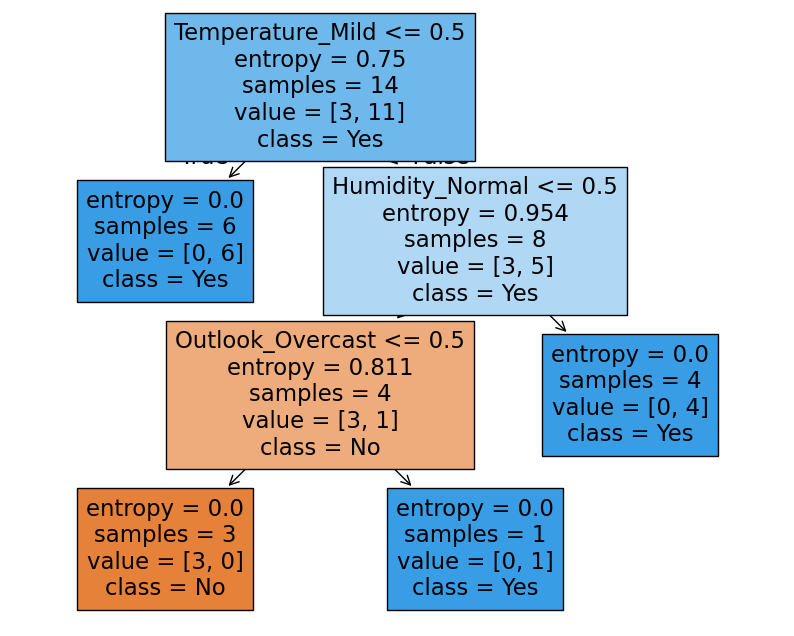

In [17]:
plt.figure(figsize=(10,8))
tree.plot_tree(clf3, feature_names=X_train3.columns.tolist(), class_names=['No', 'Yes'], filled=True)
plt.show()

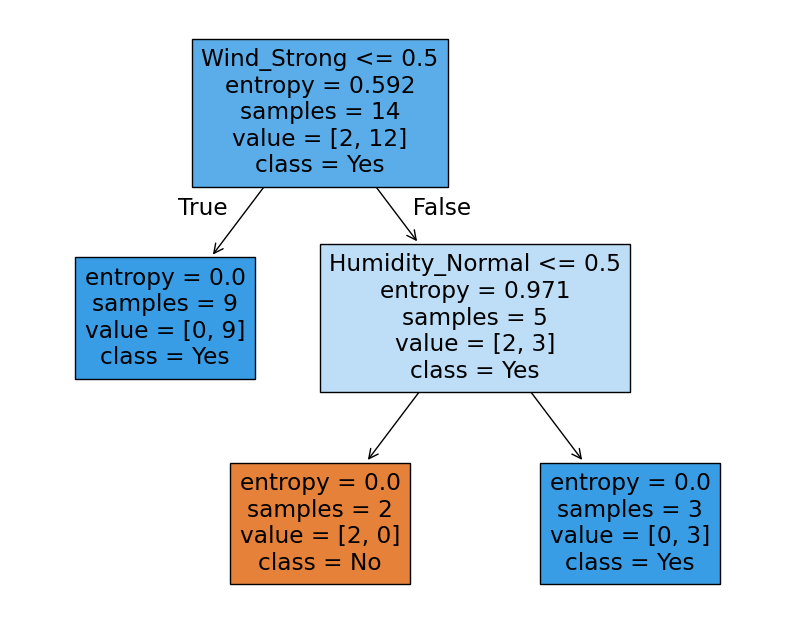

In [18]:
plt.figure(figsize=(10,8))
tree.plot_tree(clf4, feature_names=X_train4.columns.tolist(), class_names=['No', 'Yes'], filled=True)
plt.show()

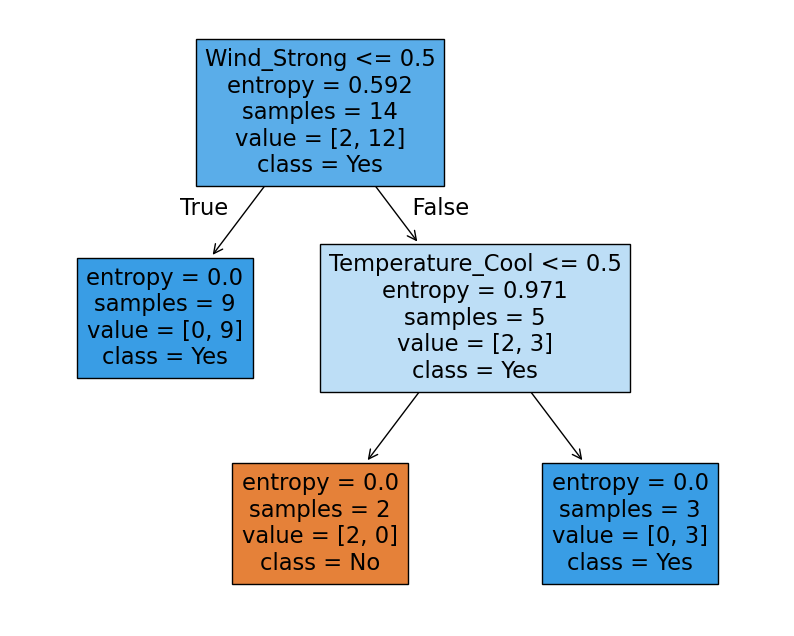

In [19]:
plt.figure(figsize=(10,8))
tree.plot_tree(clf5, feature_names=X_train5.columns.tolist(), class_names=['No', 'Yes'], filled=True)
plt.show()

### 6. Model Prediction

In [20]:
# Predict the test set results
y_pred = clf.predict(X_test)
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)
y_pred4 = clf4.predict(X_test)
y_pred5 = clf5.predict(X_test)

print("Prediction of Test set using model of origional data :",y_pred)
print("Prediction of Test set using model-1 :",y_pred1)
print("Prediction of Test set using model-2 :",y_pred2)
print("Prediction of Test set using model-3 :",y_pred3)
print("Prediction of Test set using model-4 :",y_pred4)
print("Prediction of Test set using model-5 :",y_pred5)

Prediction of Test set using model of origional data : ['No' 'No' 'Yes' 'Yes']
Prediction of Test set using model-1 : ['Yes' 'Yes' 'Yes' 'Yes']
Prediction of Test set using model-2 : ['Yes' 'Yes' 'Yes' 'Yes']
Prediction of Test set using model-3 : ['Yes' 'Yes' 'Yes' 'Yes']
Prediction of Test set using model-4 : ['Yes' 'No' 'Yes' 'Yes']
Prediction of Test set using model-5 : ['Yes' 'No' 'Yes' 'Yes']


In [21]:
predict_test1 = np.array([y_pred1[0], y_pred2[0], y_pred3[0], y_pred4[0], y_pred5[0]])
predict_test2 = np.array([y_pred1[1], y_pred2[1], y_pred3[1], y_pred4[1], y_pred5[1]])
predict_test3 = np.array([y_pred1[2], y_pred2[2], y_pred3[2], y_pred4[2], y_pred5[2]])
predict_test4 = np.array([y_pred1[3], y_pred2[3], y_pred3[3], y_pred4[3], y_pred5[3]])

print("Prediction of test set1 by each model :",predict_test1)
print("Prediction of test set2 by each model :",predict_test2)
print("Prediction of test set3 by each model :",predict_test3)
print("Prediction of test set4 by each model :",predict_test4)

Prediction of test set1 by each model : ['Yes' 'Yes' 'Yes' 'Yes' 'Yes']
Prediction of test set2 by each model : ['Yes' 'Yes' 'Yes' 'No' 'No']
Prediction of test set3 by each model : ['Yes' 'Yes' 'Yes' 'Yes' 'Yes']
Prediction of test set4 by each model : ['Yes' 'Yes' 'Yes' 'Yes' 'Yes']


In [22]:
# Use np.unique to find the unique values and their frequencies
value1, count1 = np.unique(predict_test1, return_counts=True)
value2, count2 = np.unique(predict_test2, return_counts=True)
value3, count3 = np.unique(predict_test3, return_counts=True)
value4, count4 = np.unique(predict_test4, return_counts=True)


# Find the value with the maximum frequency
majority_vote_for_test1 = value1[np.argmax(count1)]
majority_vote_for_test2 = value2[np.argmax(count2)]
majority_vote_for_test3 = value3[np.argmax(count3)]
majority_vote_for_test4 = value4[np.argmax(count4)]


# Output the most frequent value
print("Prediction of test set 1 is =",majority_vote_for_test1)
print("Prediction of test set 2 is =",majority_vote_for_test2)
print("Prediction of test set 3 is =",majority_vote_for_test3)
print("Prediction of test set 4 is =",majority_vote_for_test4)

# Final Prediction
y_pred = np.array([majority_vote_for_test1,majority_vote_for_test2,majority_vote_for_test3,majority_vote_for_test4])
y_pred

Prediction of test set 1 is = Yes
Prediction of test set 2 is = Yes
Prediction of test set 3 is = Yes
Prediction of test set 4 is = Yes


array(['Yes', 'Yes', 'Yes', 'Yes'], dtype='<U3')

### 7. Model Evaluation

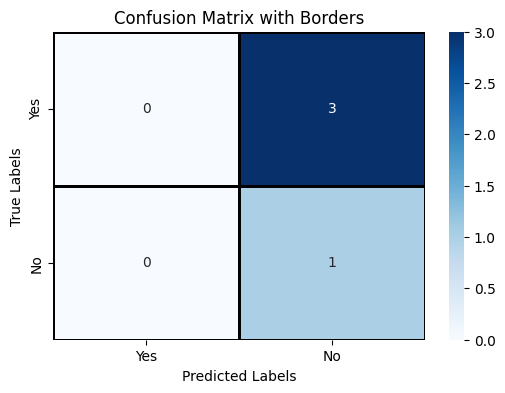

In [23]:
import seaborn as sns
import numpy as np

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix with borders
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g', 
            xticklabels=['Yes', 'No'], 
            yticklabels=['Yes', 'No'], 
            linewidths=0.8, linecolor='black')

# Add titles and labels
plt.title('Confusion Matrix with Borders')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()

In [24]:
# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

          No       0.00      0.00      0.00         3
         Yes       0.25      1.00      0.40         1

    accuracy                           0.25         4
   macro avg       0.12      0.50      0.20         4
weighted avg       0.06      0.25      0.10         4



C:\Users\abc\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abc\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abc\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Example-3

### 1. Import the Libraries

In [1]:
# Load a sample dataset using sklearn 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
iris = load_iris()

### 2. Load the Datasets

In [2]:
# Create a DataFrame
df = pd.read_csv("iris_data.csv")
print(len(df))
df.head()

150


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
# Get distinct values and their counts in the 'target' column
target_counts = df['target'].value_counts()
print("Distict values and its count of",target_counts)

Distict values and its count of target
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64


### 3. Binary encoding the target variable

In [7]:
df_encoded = pd.get_dummies(df.drop('target', axis=1))
#df_encoded['target'] = df['target'].map({0: 'Setosa', 1: 'Versicolor',2:'Virginica'}) 
df_encoded['target'] = df['target']
X = df_encoded.drop('target', axis=1)  # Features
y = df_encoded['target']  # Target

### 4. Splitting the Datasets into Train and Test set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
# Combine df1 and df2 side by side (column-wise) to get train data together
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
22,4.6,3.6,1.0,0.2,Setosa
15,5.7,4.4,1.5,0.4,Setosa
65,6.7,3.1,4.4,1.4,Versicolor
11,4.8,3.4,1.6,0.2,Setosa
42,4.4,3.2,1.3,0.2,Setosa


### 5. Bagging using sampling with replacement

In [10]:
# Function to create bootstrap samples (now called frames)
def create_bootstrap_frames(df_train, n_frames=5):
    # Each frame will contain all 14 rows, sampled with replacement
    bootstrap_frames = [df_train.sample(n=len(df_train), replace=True).reset_index(drop=True) for m in range(n_frames)]
    return bootstrap_frames

# Create 5 bootstrap frames
bootstrap_frames = create_bootstrap_frames(df_train, n_frames=5)

# Assign the frames to individual variables
df_train1, df_train2, df_train3, df_train4, df_train5 = bootstrap_frames

# Display the 5 dataframes
print("df_train1:\n", df_train1, "\n")
print("df_train2:\n", df_train2, "\n")
print("df_train3:\n", df_train3, "\n")
print("df_train4:\n", df_train4, "\n")
print("df_train5:\n", df_train5, "\n")

df_train1:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.5               2.5                4.0               1.3   
1                  6.3               2.8                5.1               1.5   
2                  4.4               3.0                1.3               0.2   
3                  6.3               2.5                4.9               1.5   
4                  5.1               3.3                1.7               0.5   
..                 ...               ...                ...               ...   
115                5.9               3.0                5.1               1.8   
116                6.3               2.9                5.6               1.8   
117                7.1               3.0                5.9               2.1   
118                4.9               2.4                3.3               1.0   
119                5.5               2.5                4.0               1.3   

         target

In [11]:
# Split the df into features and target
X_train = df_train[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
y_train = df_train[['target']]

X_train1 = df_train1[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
y_train1 = df_train1[['target']]

X_train2 = df_train2[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
y_train2 = df_train2[['target']]

X_train3 = df_train3[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
y_train3 = df_train3[['target']]

X_train4 = df_train4[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
y_train4 = df_train4[['target']]

X_train5 = df_train5[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
y_train5 = df_train5[['target']]

### 6. Train the Classifier

In [12]:
# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [13]:
# Train the Decision Tree Classifier
clf1 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf1.fit(X_train1, y_train1)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [14]:
# Train the Decision Tree Classifier
clf2 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf2.fit(X_train2, y_train2)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [15]:
# Train the Decision Tree Classifier
clf3 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf3.fit(X_train3, y_train3)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [16]:
# Train the Decision Tree Classifier
clf4 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf4.fit(X_train4, y_train4)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [17]:
# Train the Decision Tree Classifier
clf5 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf5.fit(X_train5, y_train5)

DecisionTreeClassifier(criterion='entropy', random_state=42)

### 7. Predict and evalaute the model

In [18]:
# Predict the test set results
y_pred = clf.predict(X_test)
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)
y_pred4 = clf4.predict(X_test)
y_pred5 = clf5.predict(X_test)

print("Prediction of Test set using model of oriional data :",y_pred)
print("\n")
print("Prediction of Test set using model-1 :",y_pred1)
print("\n")
print("Prediction of Test set using model-2 :",y_pred2)
print("\n")
print("Prediction of Test set using model-3 :",y_pred3)
print("\n")
print("Prediction of Test set using model-4 :",y_pred4)
print("\n")
print("Prediction of Test set using model-5 :",y_pred5)

Prediction of Test set using model of oriional data : ['Versicolor' 'Setosa' 'Virginica' 'Versicolor' 'Versicolor' 'Setosa'
 'Versicolor' 'Virginica' 'Versicolor' 'Versicolor' 'Virginica' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Versicolor' 'Virginica' 'Versicolor'
 'Versicolor' 'Virginica' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Virginica' 'Virginica' 'Virginica' 'Virginica' 'Setosa' 'Setosa']


Prediction of Test set using model-1 : ['Versicolor' 'Setosa' 'Virginica' 'Versicolor' 'Versicolor' 'Setosa'
 'Versicolor' 'Virginica' 'Versicolor' 'Versicolor' 'Virginica' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Versicolor' 'Virginica' 'Versicolor'
 'Versicolor' 'Virginica' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Virginica' 'Virginica' 'Virginica' 'Virginica' 'Setosa' 'Setosa']


Prediction of Test set using model-2 : ['Versicolor' 'Setosa' 'Virginica' 'Versicolor' 'Virginica' 'Setosa'
 'Versicolor' 'Virginica' 'Versicolor' 'Versicolor' 'Virginica' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Ver

In [19]:
y_pred = np.array([y_pred1,y_pred2,y_pred3,y_pred4,y_pred5])
y_pred

array([['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
        'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
        'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
        'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
        'Virginica', 'Setosa', 'Virginica', 'Setosa', 'Virginica',
        'Virginica', 'Virginica', 'Virginica', 'Virginica', 'Setosa',
        'Setosa'],
       ['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Virginica',
        'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
        'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
        'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
        'Virginica', 'Setosa', 'Virginica', 'Setosa', 'Virginica',
        'Virginica', 'Virginica', 'Virginica', 'Virginica', 'Setosa',
        'Setosa'],
       ['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
        'Setosa', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
  

In [20]:
np.shape(y_pred)

(5, 30)

In [21]:
j = 0
for i in range(1,31):
    print(f"Prediction of test set{i} by each model : {y_pred[:,j]} ")
    j = j+1

Prediction of test set1 by each model : ['Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'] 
Prediction of test set2 by each model : ['Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'] 
Prediction of test set3 by each model : ['Virginica' 'Virginica' 'Virginica' 'Virginica' 'Virginica'] 
Prediction of test set4 by each model : ['Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'] 
Prediction of test set5 by each model : ['Versicolor' 'Virginica' 'Versicolor' 'Versicolor' 'Virginica'] 
Prediction of test set6 by each model : ['Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'] 
Prediction of test set7 by each model : ['Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'] 
Prediction of test set8 by each model : ['Virginica' 'Virginica' 'Versicolor' 'Virginica' 'Virginica'] 
Prediction of test set9 by each model : ['Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'] 
Prediction of test set10 by each model : ['Versicolor' 'Versicolor' 'Versicolor

In [22]:
j = 0
majority_votes = []  # List to store majority votes for each test set

for i in range(1, 31):
    # Get unique values and their counts for the j-th column in y_pred
    values, counts = np.unique(y_pred[:, j], return_counts=True)
    
    # Find the value with the highest count (majority vote)
    majority_vote = values[np.argmax(counts)]
    
    # Store the result in the list
    majority_votes.append(majority_vote)
    
    # Print the result for each test set
    print(f"Prediction of test set {i} is =", majority_vote)
    
    # Increment j to move to the next test set
    j += 1

# Final Prediction: Convert the list to a NumPy array to store all majority votes together
y_pred_final = np.array(majority_votes)

# Print all predictions together
print("\nFinal Prediction for all test sets:", y_pred_final)

Prediction of test set 1 is = Versicolor
Prediction of test set 2 is = Setosa
Prediction of test set 3 is = Virginica
Prediction of test set 4 is = Versicolor
Prediction of test set 5 is = Versicolor
Prediction of test set 6 is = Setosa
Prediction of test set 7 is = Versicolor
Prediction of test set 8 is = Virginica
Prediction of test set 9 is = Versicolor
Prediction of test set 10 is = Versicolor
Prediction of test set 11 is = Virginica
Prediction of test set 12 is = Setosa
Prediction of test set 13 is = Setosa
Prediction of test set 14 is = Setosa
Prediction of test set 15 is = Setosa
Prediction of test set 16 is = Versicolor
Prediction of test set 17 is = Virginica
Prediction of test set 18 is = Versicolor
Prediction of test set 19 is = Versicolor
Prediction of test set 20 is = Virginica
Prediction of test set 21 is = Setosa
Prediction of test set 22 is = Virginica
Prediction of test set 23 is = Setosa
Prediction of test set 24 is = Virginica
Prediction of test set 25 is = Virginica

### 7. Evaluate the Model

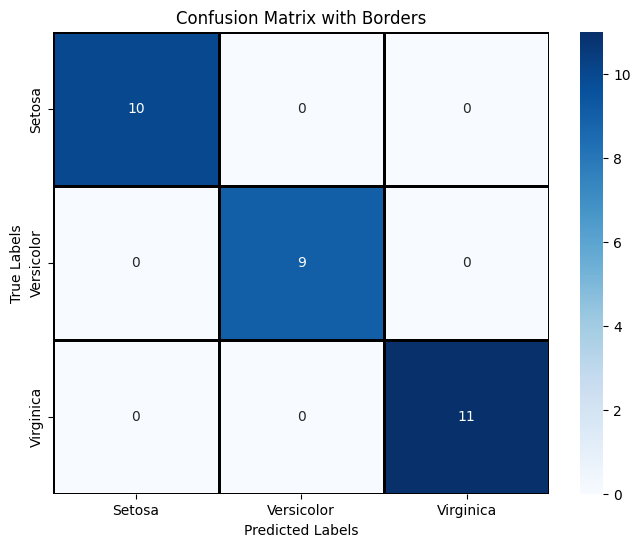

In [23]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_final)

# Create a heatmap for the confusion matrix with borders
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g', 
            xticklabels=['Setosa', 'Versicolor', 'Virginica'], 
            yticklabels=['Setosa', 'Versicolor', 'Virginica'], 
            linewidths=0.8, linecolor='black')

# Add titles and labels
plt.title('Confusion Matrix with Borders')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()


In [24]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))


Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 8. Visualizing the Decision Tree

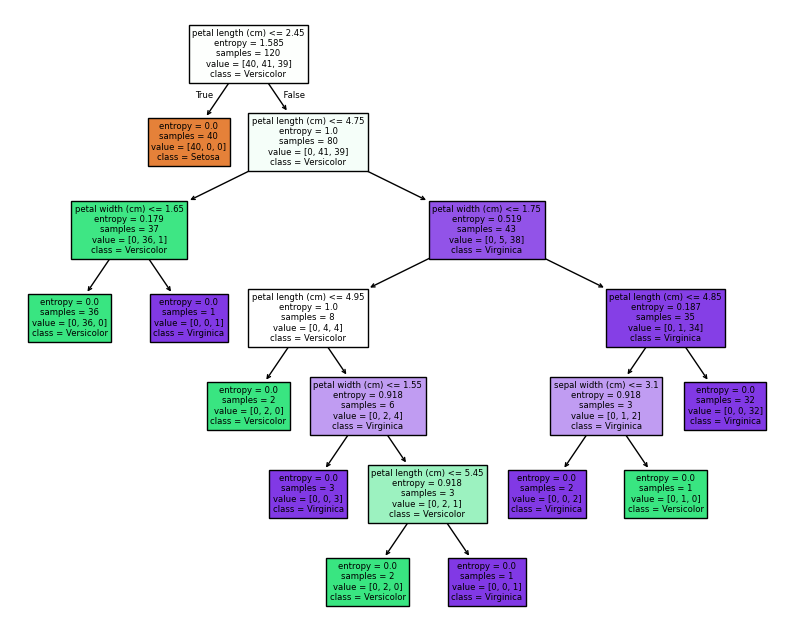

In [25]:
plt.figure(figsize=(10,8))
tree.plot_tree(clf, feature_names=X_train.columns.tolist(), class_names=['Setosa', 'Versicolor','Virginica' ], filled=True)
plt.show()

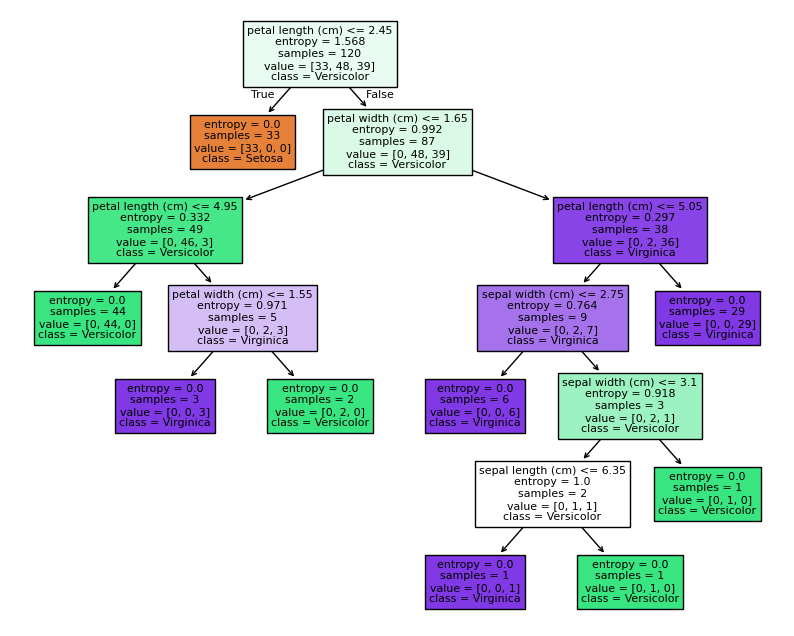

In [26]:
plt.figure(figsize=(10,8))
tree.plot_tree(clf1, feature_names=X_train1.columns.tolist(), class_names=['Setosa', 'Versicolor','Virginica' ], filled=True)
plt.show()

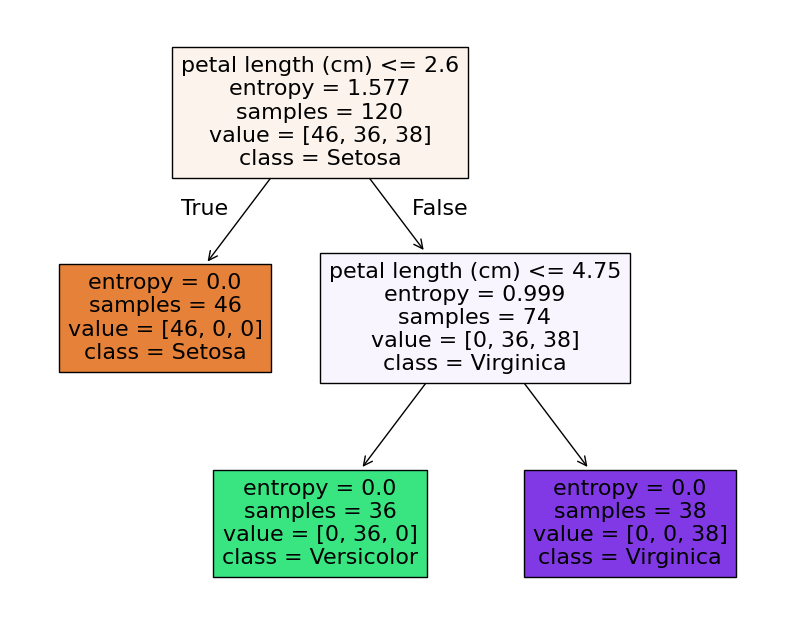

In [27]:
plt.figure(figsize=(10,8))
tree.plot_tree(clf2, feature_names=X_train2.columns.tolist(), class_names=['Setosa', 'Versicolor','Virginica' ], filled=True)
plt.show()

## Example-4:

In [34]:
df = pd.read_csv("House_Data.csv")
print(len(df))
df.head()

21613


,Id,Size (sqft),Number of Bedrooms,Number of Floors,Age of Home,Price (1000s dollars)
0,7129300520,1180,3,1,85,221.9
1,6414100192,2570,3,2,89,538.0
2,5631500400,770,2,1,107,180.0
3,2487200875,1960,4,1,75,604.0
4,1954400510,1680,3,1,53,510.0


In [35]:
df = df.drop('Id', axis=1)
df.head()

,Size (sqft),Number of Bedrooms,Number of Floors,Age of Home,Price (1000s dollars)
0,1180,3,1,85,221.9
1,2570,3,2,89,538.0
2,770,2,1,107,180.0
3,1960,4,1,75,604.0
4,1680,3,1,53,510.0
